In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [93]:
url = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
data

[{'transaction_id': 1,
  'transaction_date': '01-11-2023',
  'customer_name': 'John Doe',
  'transaction_amount': 50,
  'item_category': 'book',
  'item_name': 'The Great Gatsby',
  'payment_method': 'credit card',
  'status': 'success'},
 {'transaction_id': 2,
  'transaction_date': '01-11-2023',
  'customer_name': 'Jane Smith',
  'transaction_amount': 120.5,
  'item_category': 'gaming',
  'item_name': 'PlayStation 5',
  'payment_method': 'cash',
  'status': 'success'},
 {'transaction_id': 3,
  'transaction_date': '02-11-2023',
  'customer_name': 'Bob Johnson',
  'transaction_amount': 800,
  'item_category': 'technology',
  'item_name': 'Laptop',
  'payment_method': 'credit card',
  'status': 'failed'},
 {'transaction_id': 4,
  'transaction_date': '03-11-2023',
  'customer_name': 'Alice Williams',
  'transaction_amount': 30,
  'item_category': 'kitchen',
  'item_name': 'Coffee Maker',
  'payment_method': 'e wallet',
  'status': 'success'},
 {'transaction_id': 5,
  'transaction_date': '

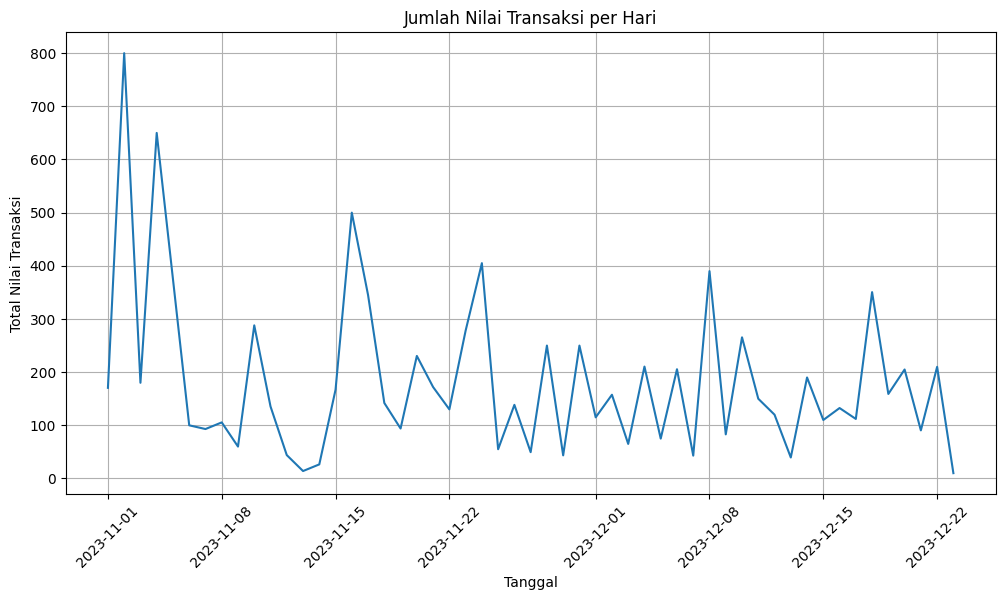

In [94]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')
daily_sales = df.groupby(df['transaction_date'].dt.date)['transaction_amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Nilai Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


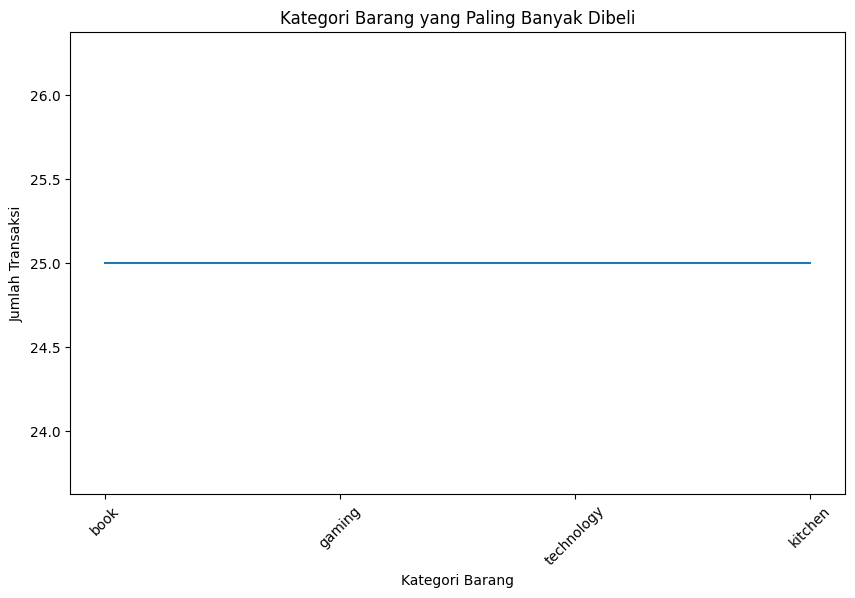

In [95]:
popular_category = df['item_category'].mode()[0]

category_counts = df['item_category'].value_counts()
plt.figure(figsize=(10, 6))
plt.plot(category_counts.index, category_counts.values)
plt.title('Kategori Barang yang Paling Banyak Dibeli')
plt.xlabel('Kategori Barang')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()


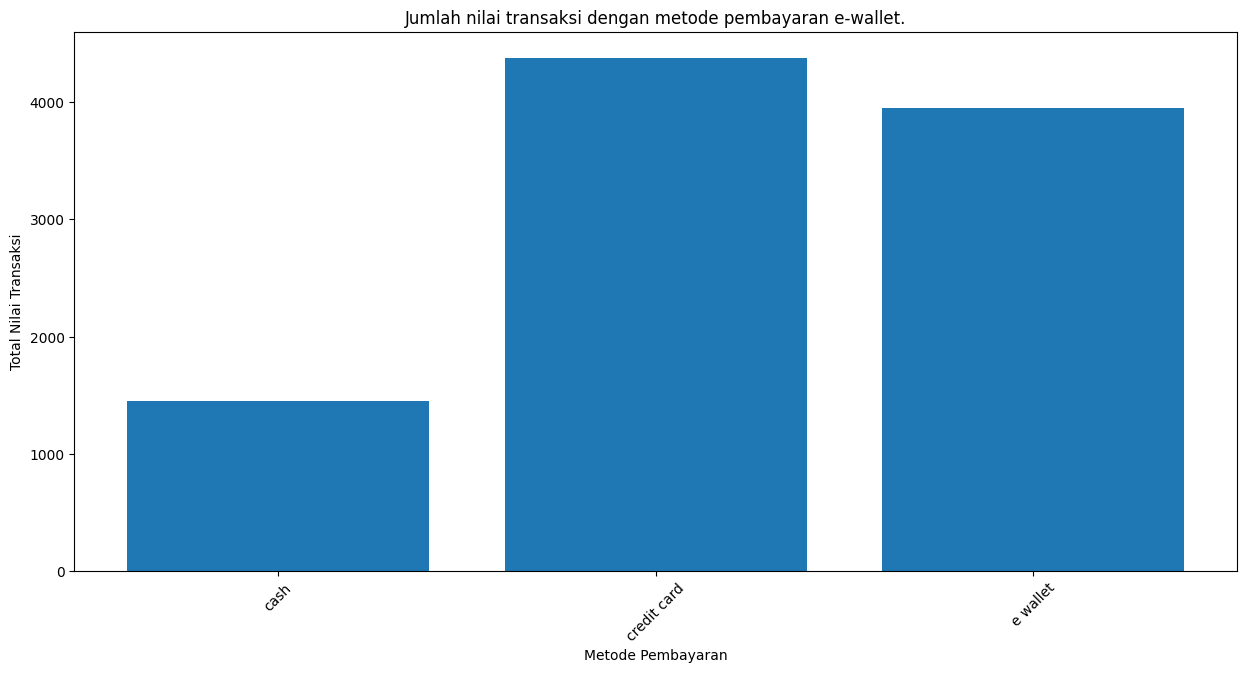

In [96]:
ewallet = df.groupby('payment_method')['transaction_amount'].sum()

plt.figure(figsize=(15, 7))
plt.bar(ewallet.index, ewallet.values)
plt.title('Jumlah nilai transaksi dengan metode pembayaran e-wallet.')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Nilai Transaksi')
plt.xticks(rotation=45)
plt.show()


Nilai Maksimal Transaksi: 800.0
Nilai Minimal Transaksi: 5.0
Nilai Tengah Transaksi: 47.5


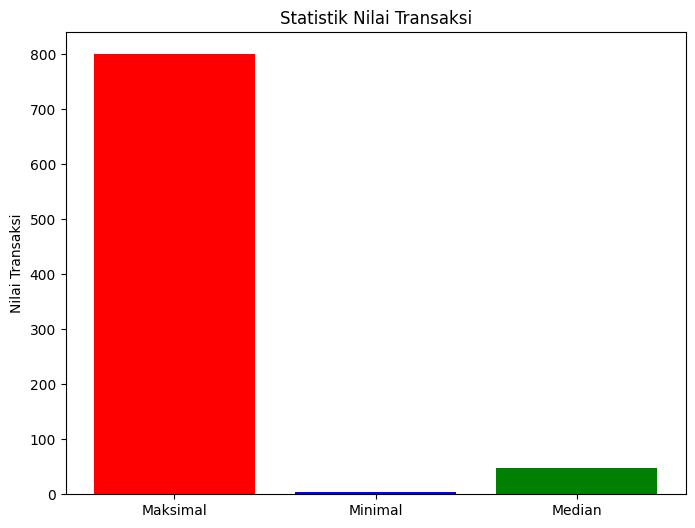

In [101]:
max = df['transaction_amount'].max()
min = df['transaction_amount'].min()
median = df['transaction_amount'].median()

print(f"Nilai Maksimal Transaksi: {max}")
print(f"Nilai Minimal Transaksi: {min}")
print(f"Nilai Tengah Transaksi: {median}")

plt.figure(figsize=(8, 6))
plt.bar(['Maksimal', 'Minimal', 'Median'], [max, min, median], color=['red', 'blue', 'green'])
plt.title('Statistik Nilai Transaksi')
plt.ylabel('Nilai Transaksi')
plt.show()